# <p align="center"><b>Assignment 1 Group#2</b></p>

In [62]:
# These are the libraries used. 
# If they are not installed on your computer, run: !pip install pandas numpy matplotlib
# The Python version used was 3.8.20
import pandas as pd
import numpy as np
from pylab import plt, mpl

In [63]:
# Defining global settings for the plots
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'

In [64]:
# ===========================================================================================================================================================================================================================================================================
# Insert here the paths of the Excel files located in the folder,
# making sure to keep the syntax r"path_to_file"
# ===========================================================================================================================================================================================================================================================================

# Stefano_MSI 
# sautner_csv = r"C:\Users\stefa\OneDrive\MSI\Sustainable Finance\1. Assignment_1\firmquarter_score_2024Q4_Version_2025_Jul_03.csv"
# eglks_excel = r"C:\Users\stefa\OneDrive\MSI\Sustainable Finance\1. Assignment_1\EGLKS_data.xlsx"
# li_excel = r"C:\Users\stefa\OneDrive\MSI\Sustainable Finance\1. Assignment_1\Measures_LSTY_092023.xlsx"

# Stefano_MacBook
# sautner_csv = r"/Users/stefanoegidi/Library/CloudStorage/OneDrive-Personal/MSI/Sustainable Finance/1. Assignment_1/firmquarter_score_2024Q4_Version_2025_Jul_03.csv"
# eglks_excel = r"/Users/stefanoegidi/Library/CloudStorage/OneDrive-Personal/MSI/Sustainable Finance/1. Assignment_1/EGLKS_data.xlsx"
# li_excel = r"/Users/stefanoegidi/Library/CloudStorage/OneDrive-Personal/MSI/Sustainable Finance/1. Assignment_1/Measures_LSTY_092023.xlsx"

# New User_laptop
sautner_csv = r"firmquarter_score_2024Q4_Version_2025_Jul_03.csv"
eglks_excel = r"EGLKS_data.xlsx"
li_excel = r"Measures_LSTY_092023.xlsx"

# <p align="center"><b>You may now execute "Run All" to generate the outputs</b></p>

# **1. NLP Measures of Climate Risk**

Consider the climate risk measures from Sautner et al. (2023).  
Focus your analysis on U.S. public firms, that is, firms headquartered in the United States.  
Multiply all measures by the factor 1000 for better readability in graphs.  
To visualize data in Python, you can use the matplotlib or seaborn library.

# ***a)*** 
NLP-based climate risk measures use text analysis of corporate reports and earnings calls to detect climate-related terms. These dictionaries capture dimensions such as risk, exposure, opportunities, and sentiment. The frequency of these terms provides standardized indicators of firms’ climate risk disclosure.

In [65]:
# Load the raw data from Sautner et al.
sautner_raw = pd.read_csv(sautner_csv, low_memory = False)
sautner_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427467 entries, 0 to 427466
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   isin           427467 non-null  object 
 1   year           427467 non-null  int64  
 2   quarter        427467 non-null  int64  
 3   cc_expo_ew     427467 non-null  float64
 4   cc_risk_ew     427467 non-null  float64
 5   cc_pos_ew      427467 non-null  float64
 6   cc_neg_ew      427467 non-null  float64
 7   cc_sent_ew     427467 non-null  float64
 8   op_expo_ew     427467 non-null  float64
 9   op_risk_ew     427467 non-null  float64
 10  op_pos_ew      427467 non-null  float64
 11  op_neg_ew      427467 non-null  float64
 12  op_sent_ew     427467 non-null  float64
 13  rg_expo_ew     427467 non-null  float64
 14  rg_risk_ew     427467 non-null  float64
 15  rg_pos_ew      427467 non-null  float64
 16  rg_neg_ew      427467 non-null  float64
 17  rg_sent_ew     427467 non-nul

In [66]:
# Let's take a look at the data
sautner_raw.head()

,isin,year,quarter,cc_expo_ew,cc_risk_ew,cc_pos_ew,cc_neg_ew,cc_sent_ew,op_expo_ew,op_risk_ew,...,rg_neg_ew,rg_sent_ew,ph_expo_ew,ph_risk_ew,ph_pos_ew,ph_neg_ew,ph_sent_ew,gvkey,cusip,hqcountrycode
0,AEA000801018,2023,4,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251139.0,NaN,AE
1,AEA000801018,2024,1,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251139.0,NaN,AE
2,AEA000801018,2024,2,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251139.0,NaN,AE
3,AEA001901015,2023,1,0.001596,0.0,0.001596,0.0,0.001596,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,284156.0,NaN,AE
4,AEA001901015,2023,3,0.003916,0.0,0.003916,0.0,0.003916,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,284156.0,NaN,AE


In [67]:
# New dataframe containing only the firms headquartered in the United States
us_firms = sautner_raw[(sautner_raw['hqcountrycode']) == 'US'].copy()
us_firms.head()

,isin,year,quarter,cc_expo_ew,cc_risk_ew,cc_pos_ew,cc_neg_ew,cc_sent_ew,op_expo_ew,op_risk_ew,...,rg_neg_ew,rg_sent_ew,ph_expo_ew,ph_risk_ew,ph_pos_ew,ph_neg_ew,ph_sent_ew,gvkey,cusip,hqcountrycode
364,AN8068571086,2003,3,0.000964,0.0,0.000321,-0.000643,-0.000321,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9465.0,806857108,US
365,AN8068571086,2004,1,0.000376,0.0,0.000000,-0.000376,-0.000376,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9465.0,806857108,US
366,AN8068571086,2004,2,0.000403,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9465.0,806857108,US
367,AN8068571086,2004,3,0.000420,0.0,0.000000,-0.000840,-0.000840,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9465.0,806857108,US
368,AN8068571086,2004,4,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9465.0,806857108,US


In [68]:
# Scale factor for the measures
scale = 1000

In [69]:
# Quickly multiply all measures by the scale factor
measures_to_scale = [col for col in us_firms.columns if col.endswith('_ew')]
us_firms[measures_to_scale] = us_firms[measures_to_scale] * scale

In [70]:
# Let's take a look at the new data
us_firms.head()

,isin,year,quarter,cc_expo_ew,cc_risk_ew,cc_pos_ew,cc_neg_ew,cc_sent_ew,op_expo_ew,op_risk_ew,...,rg_neg_ew,rg_sent_ew,ph_expo_ew,ph_risk_ew,ph_pos_ew,ph_neg_ew,ph_sent_ew,gvkey,cusip,hqcountrycode
364,AN8068571086,2003,3,0.964010,0.0,0.321337,-0.642674,-0.321337,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9465.0,806857108,US
365,AN8068571086,2004,1,0.376223,0.0,0.000000,-0.376223,-0.376223,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9465.0,806857108,US
366,AN8068571086,2004,2,0.403226,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9465.0,806857108,US
367,AN8068571086,2004,3,0.419992,0.0,0.000000,-0.839983,-0.839983,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9465.0,806857108,US
368,AN8068571086,2004,4,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9465.0,806857108,US


# ***b)***

In [71]:
# Variabile che vogliamo analizzare
measure = "cc_expo_ew"

In [72]:
# Counting how many zero values appear in each quarter for the selected measure
zeros_over_time = us_firms.groupby(['year','quarter'])[measure].apply(lambda x: (x == 0).sum())

# Counting the total number of observations in each quarter
total_over_time = us_firms.groupby(['year','quarter'])[measure].count()

# Frequency (percentage)
zero_freq = (zeros_over_time / total_over_time) * 100

In [73]:
# Extracting the number of zeros for Q1 2002 and Q4 2017
zero_for_2002_Q1 = zeros_over_time.loc[(2002,1)]
zero_for_2017_Q4 = zeros_over_time.loc[(2017,4)]

In [74]:
# Extract the frequency (%) of zeros for Q1 2002 and Q4 2017
freq_2002_Q1 = zero_freq.loc[(2002,1)]
freq_2017_Q4 = zero_freq.loc[(2017,4)]

In [75]:
print("=" * 100)
print(f"In Q1 2002: {zero_for_2002_Q1} zeros ({freq_2002_Q1:.2f}%).")
print(f"In Q4 2017: {zero_for_2017_Q4} zeros ({freq_2017_Q4:.2f}%).")
print("=" * 100)

In Q1 2002: 151 zeros (66.23%).
In Q4 2017: 1451 zeros (48.61%).


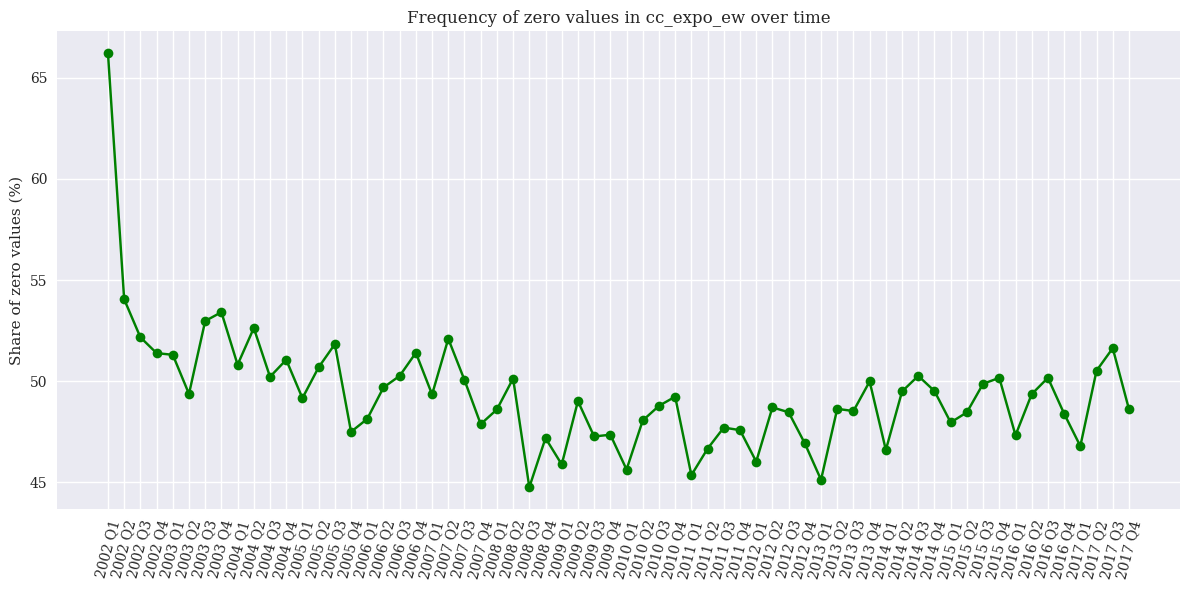

In [76]:
zero_freq_filtered = zero_freq.loc[2002:2017]
plt.figure(figsize = (12,6))
plt.plot(zero_freq_filtered.index.map(lambda x: f"{x[0]} Q{x[1]}"), zero_freq_filtered.values, color = "g", marker='o')
plt.xticks(rotation=75)
plt.ylabel("Share of zero values (%)")
plt.title("Frequency of zero values in cc_expo_ew over time")
plt.tight_layout()
plt.show();

In [77]:
labels = ["Q1 2002", "Q4 2017"]
freqs = [freq_2002_Q1, freq_2017_Q4] 
zeros = [zero_for_2002_Q1, zero_for_2017_Q4]
totals = [total_over_time.loc[(2002,1)], total_over_time.loc[(2017,4)]]
x = np.arange(len(labels))
width = 0.35

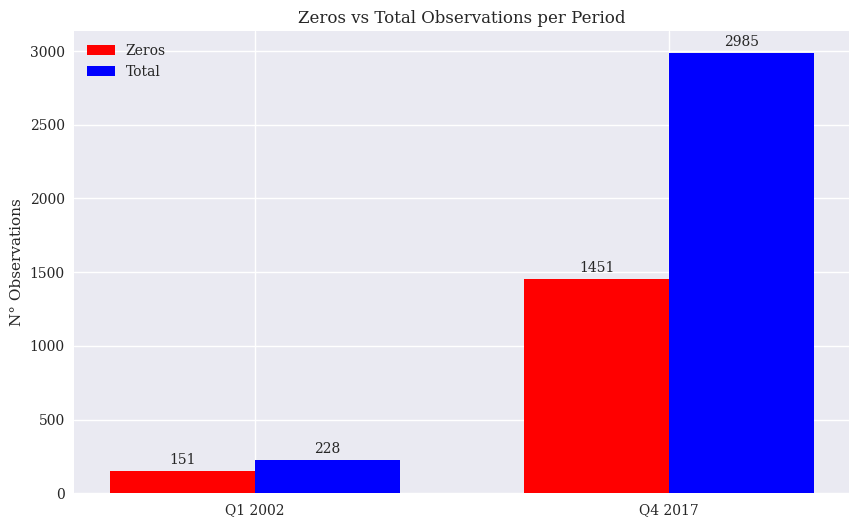

In [78]:
fig, ax = plt.subplots(figsize = (10,6))
bars1 = ax.bar(x - width/2, zeros, width, label='Zeros', color='red')
bars2 = ax.bar(x + width/2, totals, width, label='Total', color='blue')
ax.set_ylabel('N° Observations')
ax.set_title('Zeros vs Total Observations per Period')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset verticale
                    textcoords="offset points",
                    ha='center', va='bottom')
plt.show();

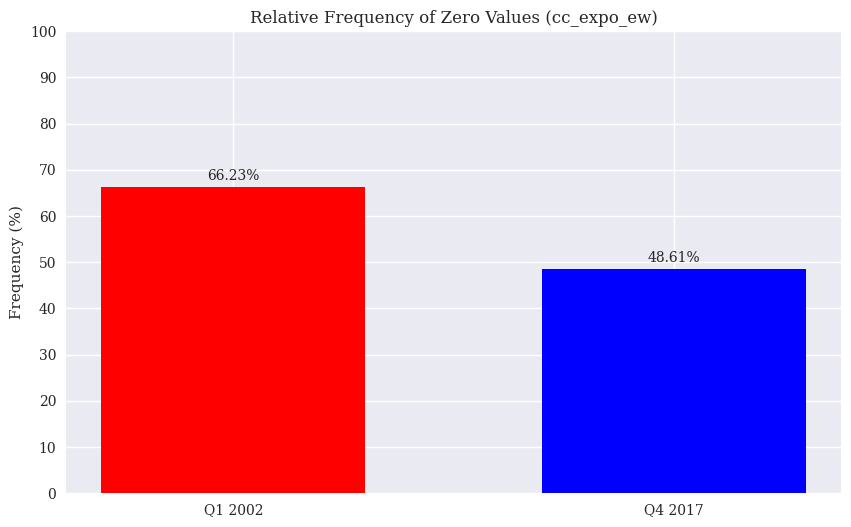

In [79]:
plt.figure(figsize=(10,6))
bars = plt.bar(labels, freqs, color=["red", "blue"], width = 0.6)

plt.ylabel("Frequency (%)")
plt.title("Relative Frequency of Zero Values (cc_expo_ew)")
plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{height:.2f}%",
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0,3),  
                 textcoords="offset points",
                 ha="center", va="bottom")

plt.show()

In the first quarter of 2002, about 152 firms (66%) had zero values of climate change exposure, while in the fourth quarter of 2017 this number rose to 1,481 firms (49%). The high number of zeros reflects the fact that many firms did not report or discuss climate risks in their disclosures. Over time, however, the frequency of zeros declined, indicating that more firms started to acknowledge climate-related issues. The remaining zeros in later years likely come from companies with limited exposure or weak disclosure practices. Overall, the results suggest growing awareness and reporting of climate risks among U.S. firms.

# ***c)***

In [80]:
# This is a function that will be used to compute the mean exposure of the top 100 firms each quarter.
# The function groups the data by year and quarter, selects the 100 firms with the 
# highest values of the chosen column, and then calculates their average.
# The result is returned as a DataFrame with the quarterly mean of the top 100 firms.
def top100_mean(df, col):
    new_df = df.groupby(['year','quarter']).apply(lambda n: n.nlargest(100, col)[col].mean()).reset_index(name = f"mean_{col}_top100")
    return new_df

In [81]:
# Filter to select only the period 2002–2017
filter = ((us_firms["year"] > 2001) & (us_firms["year"] < 2018))

# Then I can easily apply the filter to my data
us_firms_filtered = us_firms[filter].copy()

In [82]:
# Now we apply the function created earlier
us_firms_top_100_mean = top100_mean(us_firms_filtered, measure)

/var/folders/s0/pd22r75s10d03dy0v4tw8d5c0000gn/T/ipykernel_92089/290573381.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  new_df = df.groupby(['year','quarter']).apply(lambda n: n.nlargest(100, col)[col].mean()).reset_index(name = f"mean_{col}_top100")


In [83]:
# Checking if the data looks fine
us_firms_top_100_mean.head()

,year,quarter,mean_cc_expo_ew_top100
0,2002,1,0.844883
1,2002,2,4.294388
2,2002,3,4.212952
3,2002,4,4.432086
4,2003,1,5.239281


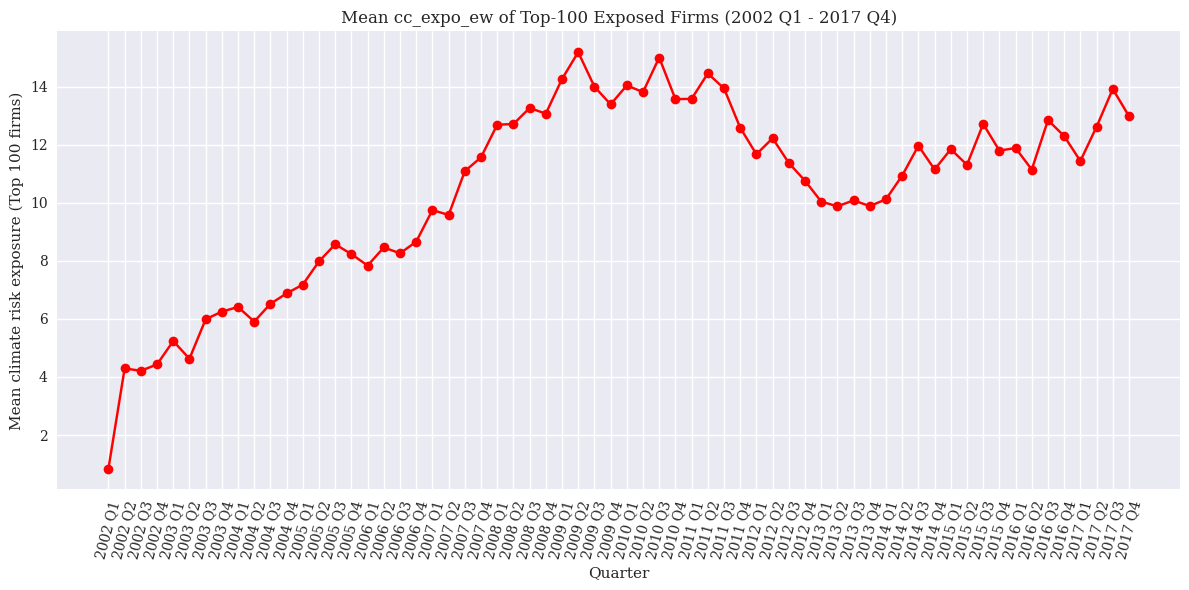

In [84]:
# This is only for the aesthetics of the plot
us_firms_top_100_mean["time"] = us_firms_top_100_mean["year"].astype(str) + " " + "Q" + us_firms_top_100_mean["quarter"].astype(str)

plt.figure(figsize=(12,6))
plt.plot(us_firms_top_100_mean["time"], us_firms_top_100_mean["mean_cc_expo_ew_top100"], color = "r", marker = "o")
plt.xticks(rotation=75)
plt.xlabel("Quarter")
plt.ylabel("Mean climate risk exposure (Top 100 firms)")
plt.title("Mean cc_expo_ew of Top-100 Exposed Firms (2002 Q1 - 2017 Q4)")
plt.tight_layout()
plt.show();

The mean climate risk exposure of the top-100 firms increased steadily from 2002 until around 2010, suggesting that climate-related issues became increasingly prominent in corporate disclosures. After 2010, exposure peaked and then declined until 2013, which may reflect shifting reporting practices or less emphasis on climate issues during that period. From 2014 onwards, the average exposure stabilized at relatively high levels, indicating a persistent recognition of climate risk among the most exposed firms. The fluctuations highlight that climate disclosure intensity is influenced both by external events (e.g., policy debates, financial crisis) and firm-specific strategies. Overall, the results show a long-term upward trend in climate risk exposure, despite temporary declines.

_____

Now, additionally download the file EGLKS_data.xlsx from the course website.   
The file contains the Wall Street Journal (WSJ) climate change attention index from Engle et al. (2020).    
A description of the WSJ climate change attention index can be found in Engle et al. (2020), pp. 1191-1196.

In [85]:
# Load the second dataset, i.e., the one with WSJ data
eglks_raw = pd.read_excel(eglks_excel, parse_dates = True) # You might need to install openpyxl, in case, please run: %pip install openpyxl
eglks_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  413 non-null    int64  
 1   wsj                   402 non-null    float64
 2   wsj_AR1_Innovation    401 non-null    float64
 3   chneg                 120 non-null    float64
 4   chneg_AR1_innovation  119 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 16.3 KB


In [86]:
# Let’s take a look at the data we have, and I immediately notice that the date format will need to be adjusted
eglks_raw.head()

,Date,wsj,wsj_AR1_Innovation,chneg,chneg_AR1_innovation
0,198401,0.003589,NaN,NaN,NaN
1,198402,0.004085,-0.000271,NaN,NaN
2,198403,0.003851,-0.000795,NaN,NaN
3,198404,0.003385,-0.001124,NaN,NaN
4,198405,0.003230,-0.001006,NaN,NaN


In [87]:
# I adjust the date format and use datetime to create two additional columns in the dataframe: 
# the first contains only the year, and the second contains the quarter
eglks_raw['Date'] = pd.to_datetime(eglks_raw['Date'], format = '%Y%m')
eglks_raw['year'] = eglks_raw['Date'].dt.year
eglks_raw['quarter'] = eglks_raw['Date'].dt.quarter

In [88]:
# I adjust the wsj column values with the scale factor used before
eglks_raw["wsj"] = eglks_raw["wsj"] * scale

In [89]:
# I create a new dataframe that contains the average WSJ index values, 
# computed for each year-quarter combination. 
wsj_quarterly = (eglks_raw.groupby(['year', 'quarter'])['wsj'].mean().reset_index())

In [90]:
# Also in this case I will use a filter
filter = ((wsj_quarterly["year"] > 2001) & (wsj_quarterly["year"] < 2018))
wsj_quarterly_filtered = wsj_quarterly[filter].copy()

In [91]:
# Merge the WSJ data with the previously computed firm-level averages, 
# matching them by year and quarter to align both datasets.
merged_data = pd.merge(us_firms_top_100_mean, wsj_quarterly_filtered, on = ['year','quarter'], how = 'inner')

In [92]:
merged_data.head()

,year,quarter,mean_cc_expo_ew_top100,time,wsj
0,2002,1,0.844883,2002 Q1,4.527681
1,2002,2,4.294388,2002 Q2,4.262091
2,2002,3,4.212952,2002 Q3,4.843405
3,2002,4,4.432086,2002 Q4,4.599920
4,2003,1,5.239281,2003 Q1,5.644830


# ***d)***

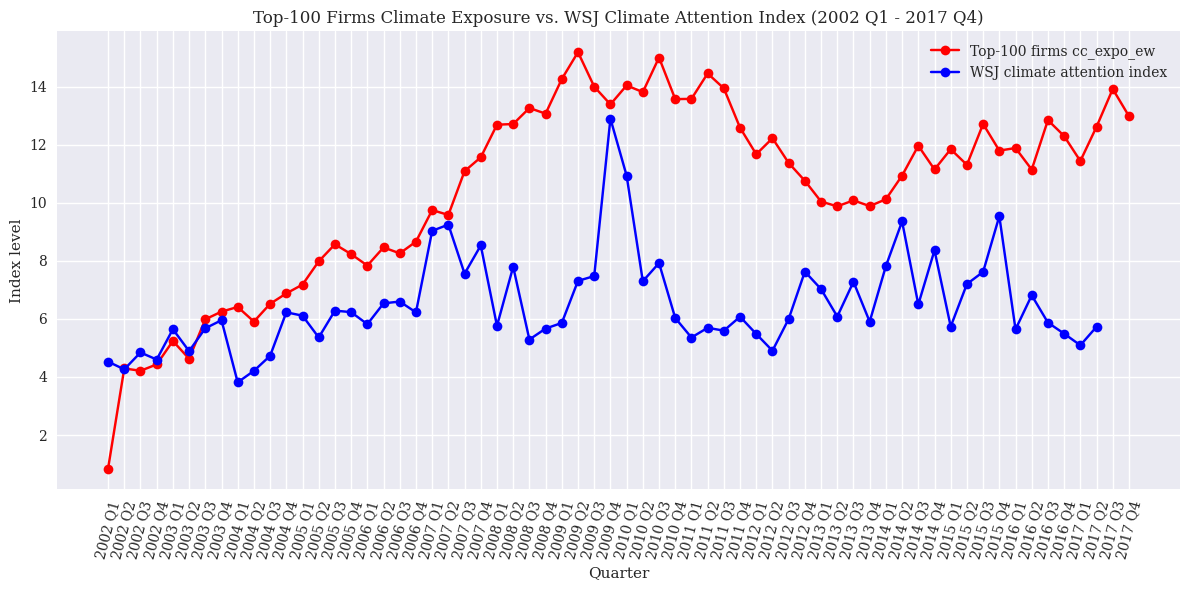

In [93]:
plt.figure(figsize=(12,6))
plt.plot(merged_data['time'], merged_data['mean_cc_expo_ew_top100'], color = 'r', marker = "o", label = 'Top-100 firms cc_expo_ew')
plt.plot(merged_data['time'], merged_data['wsj'], color='b', marker = "o", label = 'WSJ climate attention index')
plt.xticks(rotation = 75)
plt.xlabel("Quarter")
plt.ylabel("Index level")
plt.title("Top-100 Firms Climate Exposure vs. WSJ Climate Attention Index (2002 Q1 - 2017 Q4)")
plt.legend()
plt.tight_layout()
plt.show();

# ***e)***

In [94]:
us_firms_filtered.head()

,isin,year,quarter,cc_expo_ew,cc_risk_ew,cc_pos_ew,cc_neg_ew,cc_sent_ew,op_expo_ew,op_risk_ew,...,rg_neg_ew,rg_sent_ew,ph_expo_ew,ph_risk_ew,ph_pos_ew,ph_neg_ew,ph_sent_ew,gvkey,cusip,hqcountrycode
364,AN8068571086,2003,3,0.964010,0.0,0.321337,-0.642674,-0.321337,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9465.0,806857108,US
365,AN8068571086,2004,1,0.376223,0.0,0.000000,-0.376223,-0.376223,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9465.0,806857108,US
366,AN8068571086,2004,2,0.403226,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9465.0,806857108,US
367,AN8068571086,2004,3,0.419992,0.0,0.000000,-0.839983,-0.839983,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9465.0,806857108,US
368,AN8068571086,2004,4,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9465.0,806857108,US


In [95]:
# Apply the previously defined function to compute the average values for the top 100 firms
rg_top100 = top100_mean(us_firms_filtered, "rg_expo_ew")
op_top100 = top100_mean(us_firms_filtered, "op_expo_ew")
ph_top100 = top100_mean(us_firms_filtered, "ph_expo_ew")

/var/folders/s0/pd22r75s10d03dy0v4tw8d5c0000gn/T/ipykernel_92089/290573381.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  new_df = df.groupby(['year','quarter']).apply(lambda n: n.nlargest(100, col)[col].mean()).reset_index(name = f"mean_{col}_top100")
/var/folders/s0/pd22r75s10d03dy0v4tw8d5c0000gn/T/ipykernel_92089/290573381.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  new_df = df.groupby(['year','quarte

In [96]:
# Here we merge the newly created dataset with the main dataframe used in the analysis
rg_merged = pd.merge(rg_top100, wsj_quarterly, on = ['year','quarter'], how = 'inner')
op_merged = pd.merge(op_top100, wsj_quarterly, on = ['year','quarter'], how = 'inner')
ph_merged = pd.merge(ph_top100, wsj_quarterly, on = ['year','quarter'], how = 'inner')

In [97]:
rg_merged.head()

,year,quarter,mean_rg_expo_ew_top100,wsj
0,2002,1,0.027343,4.527681
1,2002,2,0.192924,4.262091
2,2002,3,0.189118,4.843405
3,2002,4,0.338836,4.599920
4,2003,1,0.389730,5.644830


In [98]:
# Computing the correlation between the WSJ index and each component of climate risk exposure
corr_rg = rg_merged['mean_rg_expo_ew_top100'].corr(rg_merged['wsj'])
corr_op = op_merged['mean_op_expo_ew_top100'].corr(op_merged['wsj'])
corr_ph = ph_merged['mean_ph_expo_ew_top100'].corr(ph_merged['wsj'])

In [99]:
print("=" * 100)
print("Correlation (Regulatory):", round(corr_rg,3))
print("Correlation (Opportunities):", round(corr_op,3))
print("Correlation (Physical risk):", round(corr_ph,3))
print("=" * 100)

Correlation (Regulatory): 0.365
Correlation (Opportunities): 0.402
Correlation (Physical risk): 0.374


The correlations between the WSJ climate change attention index and the firms’ average exposures are all positive and moderate in size. Regulatory exposure (0.40) and opportunities exposure (0.45) are the most strongly correlated, suggesting that firms’ disclosure in these areas tends to rise when media attention to climate change intensifies. Physical risk exposure also shows a positive correlation (0.43), though this likely reflects sector-specific reporting rather than broad corporate behavior. Overall, the results indicate that corporate climate disclosures co-move with public discourse captured by the WSJ index. This supports the view that media salience influences firms’ communication strategies, but the correlations are not strong enough to suggest a one-to-one relationship.

___

# **2. Aggregate Confusion in NLP Measures?**

In [100]:
# Here we upload the new dataset required for the analysis
li_raw = pd.read_excel(li_excel, parse_dates = True)

In [101]:
# Let's look if our data makes sense
li_raw.head()

,gvkey,year,qtr,tran_risk_w_std,tran_risk_pro_w_std,tran_risk_npro_w_std,phy_risk_acute_w_std,phy_risk_chronic_w_std
0,1004,2002,1,0.0,0.0,0.0,0.0,0.0
1,1004,2002,2,0.0,0.0,0.0,0.0,0.0
2,1004,2002,3,0.0,0.0,0.0,0.0,0.0
3,1004,2003,3,0.0,0.0,0.0,0.0,0.0
4,1004,2003,4,0.0,0.0,0.0,0.0,0.0


# ***a)***

In [102]:
# Selecting only the firms in 2017 Q4 from the two datasets:
# - From Li et al. (2024): I keep gvkey and the transition risk measure (tran_risk_w_std)
# - From Sautner et al. (2023): I keep also here gvkey, regulatory exposure (rg_expo_ew), and opportunities exposure (op_expo_ew)
li_2017_q4 = li_raw[(li_raw['year'] == 2017) & (li_raw['qtr'] == 4)][['gvkey', 'tran_risk_w_std']].copy()
us_firms_2017_q4 = us_firms[(us_firms['year'] == 2017) & (us_firms['quarter'] == 4)][['gvkey', 'rg_expo_ew', 'op_expo_ew']].copy()

In [103]:
# Now I can merge the two datasets (Li et al. and Sautner et al.) for 2017 Q4  
# using gvkey as the common identifier.  
data = pd.merge(li_2017_q4, us_firms_2017_q4, on = 'gvkey', how = 'inner').copy()

In [104]:
data.head()

,gvkey,tran_risk_w_std,rg_expo_ew,op_expo_ew
0,1004,0.000000,0.000000,0.000000
1,1045,0.000000,0.000000,0.000000
2,1050,3.105683,1.293661,2.587322
3,1072,0.000000,0.000000,0.000000
4,1075,4.868046,1.054852,10.548523


In [105]:
# I create the deciles with the rank method
data['tran_rank'] = data['tran_risk_w_std'].rank(method = 'first')
data['rg_rank']   = data['rg_expo_ew'].rank(method = 'first')
data['decile_tran'] = pd.qcut(data['tran_rank'], 10, labels=False)
data['decile_rg']   = pd.qcut(data['rg_rank'],   10, labels=False)


# Computing the difference between the deciles
data['decile_diff_rg'] = data['decile_tran'] - data['decile_rg']

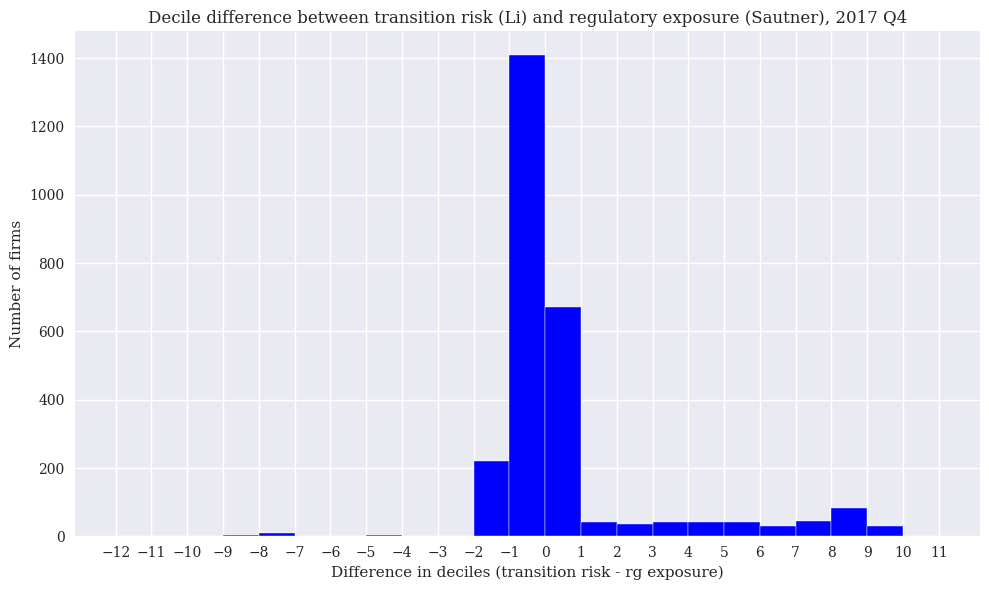

In [106]:
plt.figure(figsize = (10,6))
plt.hist(data['decile_diff_rg'], bins = np.arange(-12, 12, 1), color = "b", edgecolor = "w")
plt.xlabel("Difference in deciles (transition risk - rg exposure)")
plt.ylabel("Number of firms")
plt.title("Decile difference between transition risk (Li) and regulatory exposure (Sautner), 2017 Q4")
plt.xticks(range(-12, 12))
plt.tight_layout()
plt.show();

In [107]:
summary = (data['decile_diff_rg'].value_counts().sort_index())
print(summary)

share_close = (data['decile_diff_rg'].between(-1,1).mean())
print(f"Share with |difference| ≤ 1 decile: {share_close:.2%}")

decile_diff_rg
-9       5
-8      10
-7       2
-6       2
-5       3
-4       2
-3       2
-2     221
-1    1408
 0     670
 1      43
 2      37
 3      42
 4      42
 5      41
 6      30
 7      44
 8      82
 9      30
Name: count, dtype: int64
Share with |difference| ≤ 1 decile: 78.09%


The histogram shows that most firms have very small differences in decile rankings between the two measures. About 78% of firms fall within ±1 decile, suggesting a strong agreement between transition risk exposure (Li et al.) and regulatory exposure (Sautner et al.). Larger deviations exist but are relatively rare, indicating that the two approaches are not identical. This difference reflects their distinct methodologies: one is based on transition risk modeling, the other on text-based regulatory exposure. Overall, the two measures align well but capture complementary aspects of climate risk.

# ***b)***

In [108]:
data['op_rank'] = data['op_expo_ew'].rank(method = 'first')
data['decile_op'] = pd.qcut(data['op_rank'], 10, labels = False) 
data['decile_diff_op'] = data['decile_tran'] - data['decile_op']

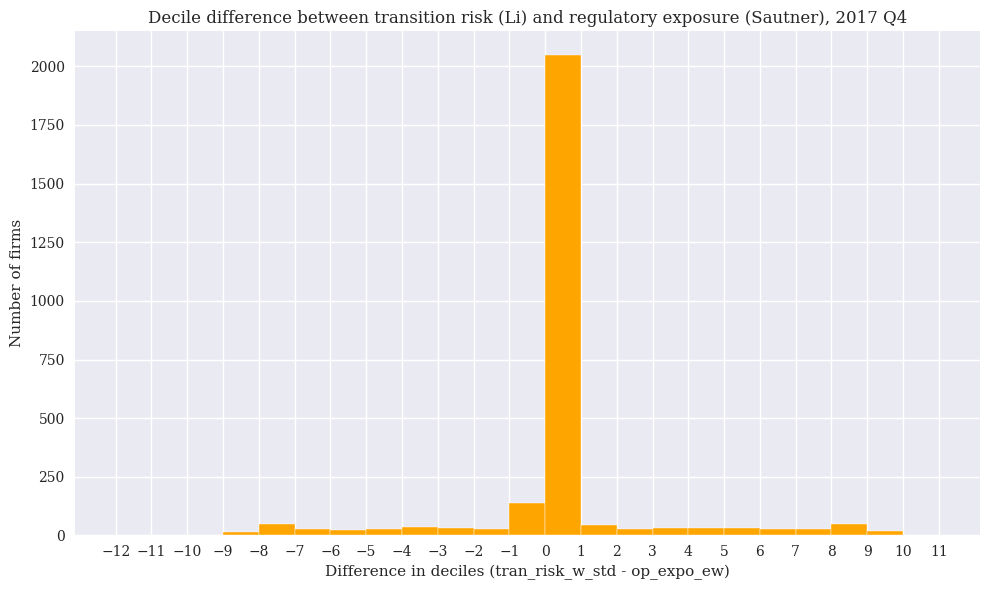

In [109]:
plt.figure(figsize=(10,6))
plt.hist(data['decile_diff_op'], bins = np.arange(-12, 12, 1), color = "orange", edgecolor = "w")
plt.xlabel("Difference in deciles (tran_risk_w_std - op_expo_ew)")
plt.ylabel("Number of firms")
plt.title("Decile difference between transition risk (Li) and regulatory exposure (Sautner), 2017 Q4")
plt.xticks(range(-12, 12))
plt.tight_layout()
plt.show();

In [110]:
summary = (data['decile_diff_op'].value_counts().sort_index())
print(summary)

share_close = (data['decile_diff_op'].between(-1,1).mean())
print(f"Share with |difference| ≤ 1 decile: {share_close:.2%}")

decile_diff_op
-9      14
-8      49
-7      27
-6      24
-5      27
-4      37
-3      31
-2      27
-1     139
 0    2047
 1      44
 2      27
 3      33
 4      33
 5      33
 6      28
 7      28
 8      50
 9      18
Name: count, dtype: int64
Share with |difference| ≤ 1 decile: 82.11%


The histogram shows that most firms fall into similar deciles when comparing transition risk exposure (Li et al.) and opportunities exposure (Sautner et al.). About 82% of firms are within ±1 decile, which indicates a strong overall agreement between the two measures. Still, there are some cases with larger differences, showing that certain firms are ranked higher in one measure than in the other. This is reasonable since transition risk captures potential costs of policy and technological change, while opportunities exposure reflects possible business gains. Overall, the two measures align well but emphasize different aspects of the climate transition.

# ***c)***

One reason for potential differences is that Li et al. (2024) use a quantitative modeling approach to estimate transition risk based on firm-level exposures to policy and technological shifts, while Sautner et al. (2023) apply NLP techniques to corporate disclosures to measure climate risk exposure. The first method captures risks in a structured, model-driven way, whereas the second depends on firms’ reporting practices and language use. As a result, the measures may diverge because they reflect different dimensions of climate risk and are influenced by distinct data sources and assumptions.